In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
%matplotlib inline
%precision 4

u'%.4f'

In [2]:
df = pd.read_csv('../datasets/polls.csv', index_col=0)
df.head()

,org,year,survey,bush,state,edu,age,female,black,weight
1,cbsnyt,1,9152,1.0,7,2,2,1,0,1403
2,cbsnyt,1,9152,1.0,33,4,3,0,0,778
3,cbsnyt,1,9152,0.0,20,2,1,1,0,1564
4,cbsnyt,1,9152,1.0,31,3,2,1,0,1055
5,cbsnyt,1,9152,1.0,18,3,1,1,0,1213


In [3]:
df.shape

(13544, 10)

In [6]:
with pm.Model() as logistic_model:
    pm.glm.glm('bush ~ female + black', df, family=pm.glm.families.Binomial())
    trace_logistic_model=pm.sample(2000, pm.NUTS(), progressbar=True)

Applied logodds-transform to p and added transformed p_logodds_ to model.
100%|██████████| 2000/2000 [00:39<00:00, 50.23it/s]


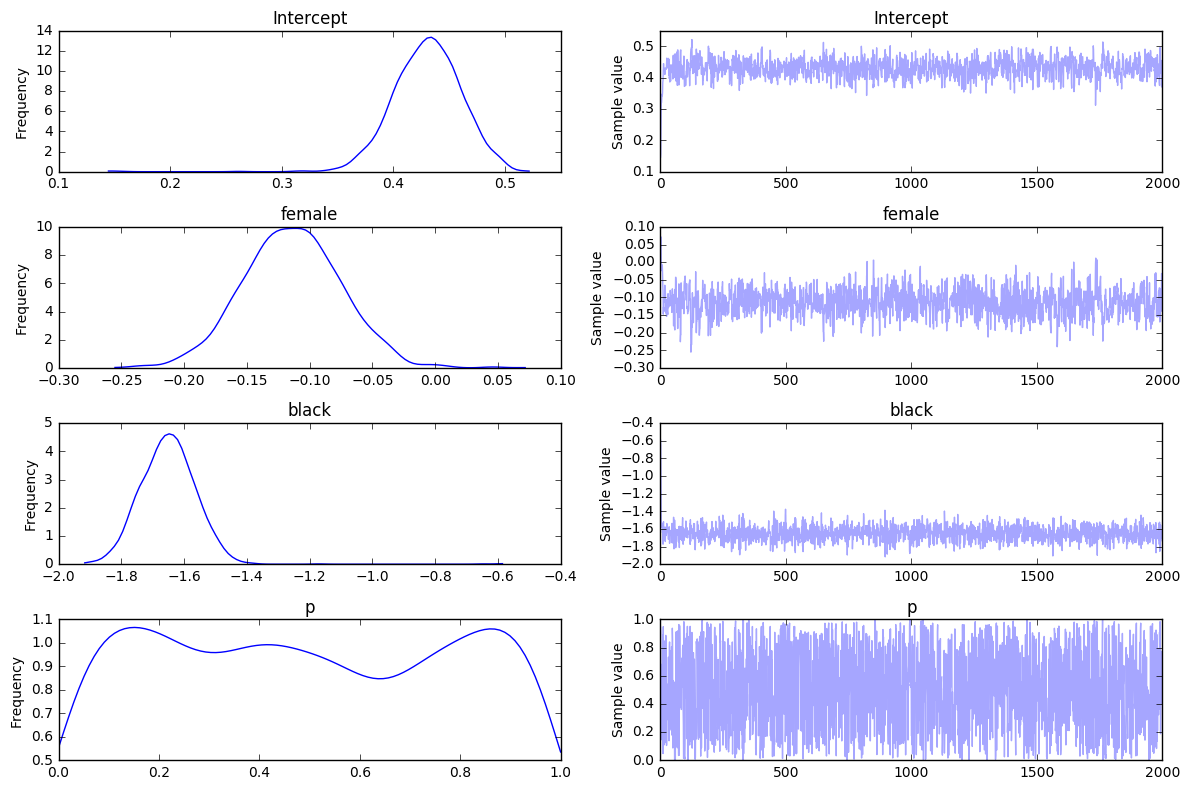

In [9]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace_logistic_model)
plt.tight_layout()

In [10]:
pm.summary(trace_logistic_model)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.430            0.031            0.001            [0.367, 0.483]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.371          0.411          0.431          0.451          0.489


female:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.114           0.039            0.001            [-0.185, -0.034]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.190         -0.140         -0.115         -0.088         -0.037


black:

  Mean             SD               MC Error         95% HPD interval
  -----------------

In [13]:
print trace_logistic_model['Intercept']
trace_logistic_model['Intercept'].shape

[ 0.1447  0.1447  0.1564 ...,  0.3706  0.3706  0.3883]


(2000,)

In [16]:
print trace_logistic_model['black']
trace_logistic_model['black'].shape

[-0.5855 -0.5855 -0.6465 ..., -1.6342 -1.6342 -1.7336]


(2000,)

In [17]:
print trace_logistic_model['female']
trace_logistic_model['female'].shape

[ 0.0445  0.0445  0.049  ..., -0.0321 -0.0321 -0.0656]


(2000,)

In [19]:
def plot_findings(trace, x_axis, y_axis):
    x = trace[x_axis]
    y = trace[y_axis]
    plt.scatter(x, y)
    plt.xlabel('%s estimates' % x_axis)
    plt.ylabel('%s estimates' % y_axis)
    plt.show()

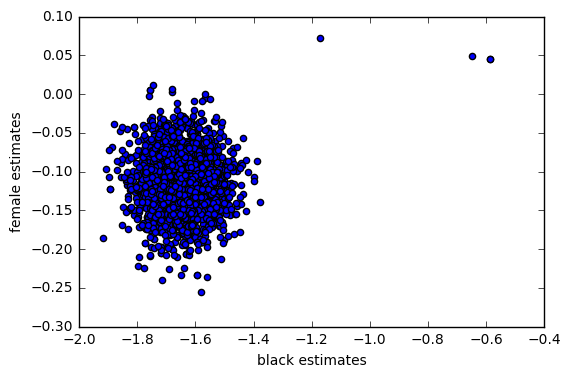

In [20]:
plot_findings(trace_logistic_model, 'black', 'female')

In [21]:
import seaborn as sns

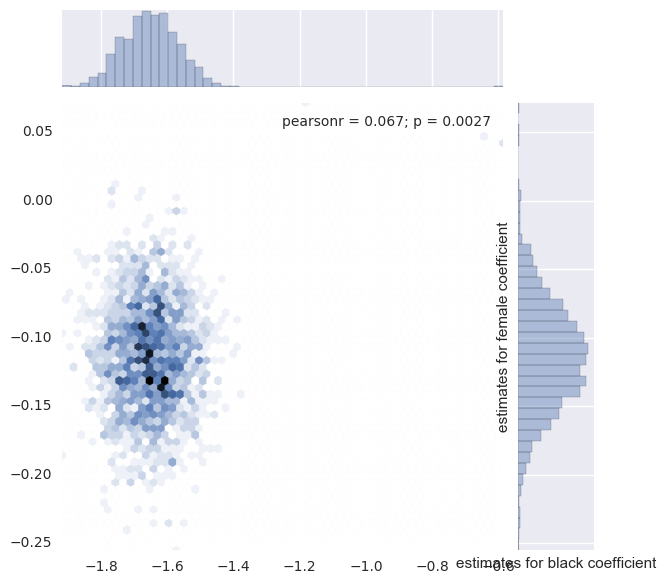

In [24]:
sns.jointplot(trace_logistic_model['black'], trace_logistic_model['female'], kind="hex")
plt.xlabel('estimates for black coefficient')
plt.ylabel('estimates for female coefficient')
plt.show()

In [38]:
def predict_indiv_model(black, female):
    # Returns a series of numbers between 0 and 1 for each run of logistic model
    return 1 / (1 + np.exp(-(trace_logistic_model['Intercept'] +
                        (trace_logistic_model['black'] * black) + 
                        (trace_logistic_model['female'] * female))))

In [39]:
def plot_results(y_series):
    plt.scatter(np.linspace(0, len(y_series), len(y_series)), 
               y_series)
    plt.hlines(y_series.mean(), 0, len(y_series))
    plt.xlabel('Model iteration')
    plt.ylabel('P(Y = 1)')
    plt.show()

white female

In [32]:
np.linspace?

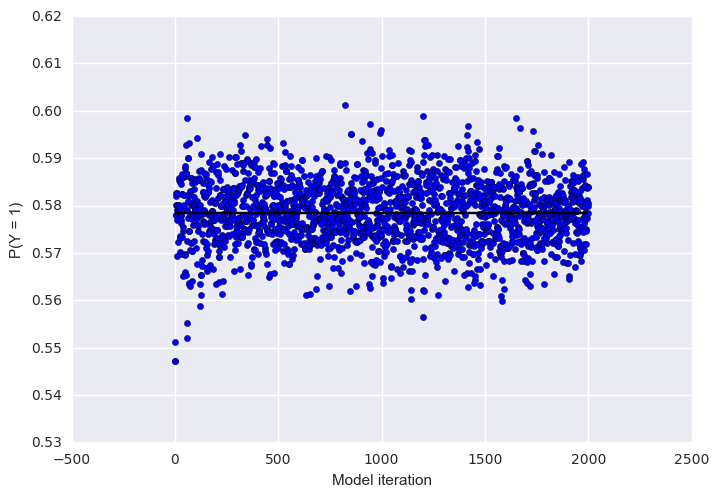

In [40]:
plot_results(predict_indiv_model(0, 1))

black female

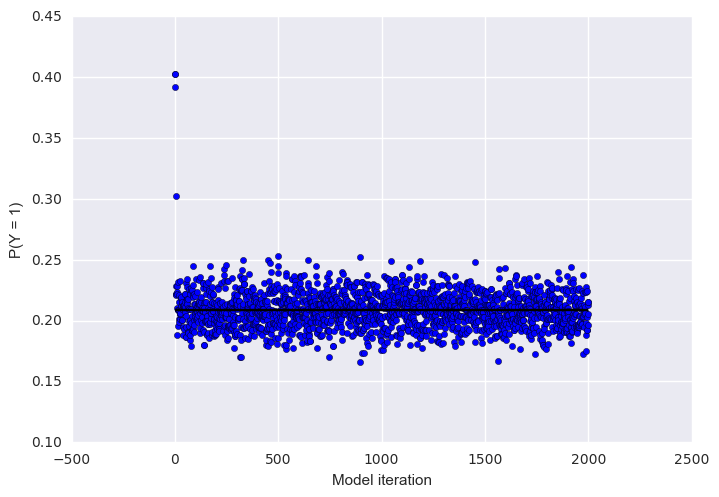

In [41]:
plot_results(predict_indiv_model(1, 1))

white men

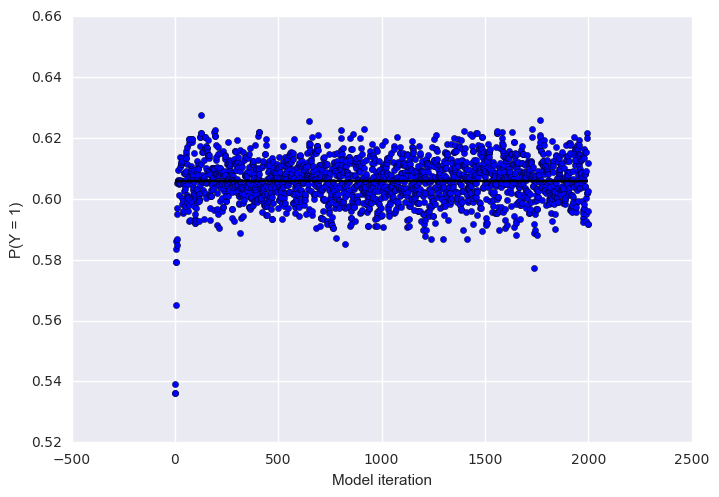

In [42]:
plot_results(predict_indiv_model(0, 0))

Bkack Men

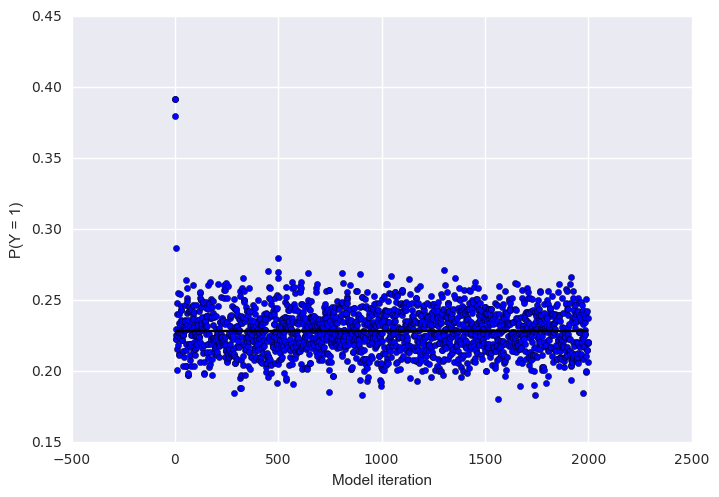

In [43]:
plot_results(predict_indiv_model(1, 0))

In [44]:
df.head()

,org,year,survey,bush,state,edu,age,female,black,weight
1,cbsnyt,1,9152,1.0,7,2,2,1,0,1403
2,cbsnyt,1,9152,1.0,33,4,3,0,0,778
3,cbsnyt,1,9152,0.0,20,2,1,1,0,1564
4,cbsnyt,1,9152,1.0,31,3,2,1,0,1055
5,cbsnyt,1,9152,1.0,18,3,1,1,0,1213


In [46]:
df=df.join(pd.get_dummies(df.edu, prefix='edu'))
df.head()

,org,year,survey,bush,state,edu,age,female,black,weight,edu_1,edu_2,edu_3,edu_4
1,cbsnyt,1,9152,1.0,7,2,2,1,0,1403,0.0,1.0,0.0,0.0
2,cbsnyt,1,9152,1.0,33,4,3,0,0,778,0.0,0.0,0.0,1.0
3,cbsnyt,1,9152,0.0,20,2,1,1,0,1564,0.0,1.0,0.0,0.0
4,cbsnyt,1,9152,1.0,31,3,2,1,0,1055,0.0,0.0,1.0,0.0
5,cbsnyt,1,9152,1.0,18,3,1,1,0,1213,0.0,0.0,1.0,0.0


In [47]:
df=df.join(pd.get_dummies(df.age, prefix='age'))
df.head()

,org,year,survey,bush,state,edu,age,female,black,weight,edu_1,edu_2,edu_3,edu_4,age_1,age_2,age_3,age_4
1,cbsnyt,1,9152,1.0,7,2,2,1,0,1403,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,cbsnyt,1,9152,1.0,33,4,3,0,0,778,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,cbsnyt,1,9152,0.0,20,2,1,1,0,1564,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,cbsnyt,1,9152,1.0,31,3,2,1,0,1055,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,cbsnyt,1,9152,1.0,18,3,1,1,0,1213,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Lets start by just adding age

In [50]:
with pm.Model() as logistic_model:
    pm.glm.glm('bush ~ female + black + edu + age_1 + age_2', df, family=pm.glm.families.Binomial())
    trace_logistic_model=pm.sample(2000, pm.NUTS(), progressbar=True)

Applied logodds-transform to p and added transformed p_logodds_ to model.
100%|██████████| 2000/2000 [01:12<00:00, 28.20it/s]


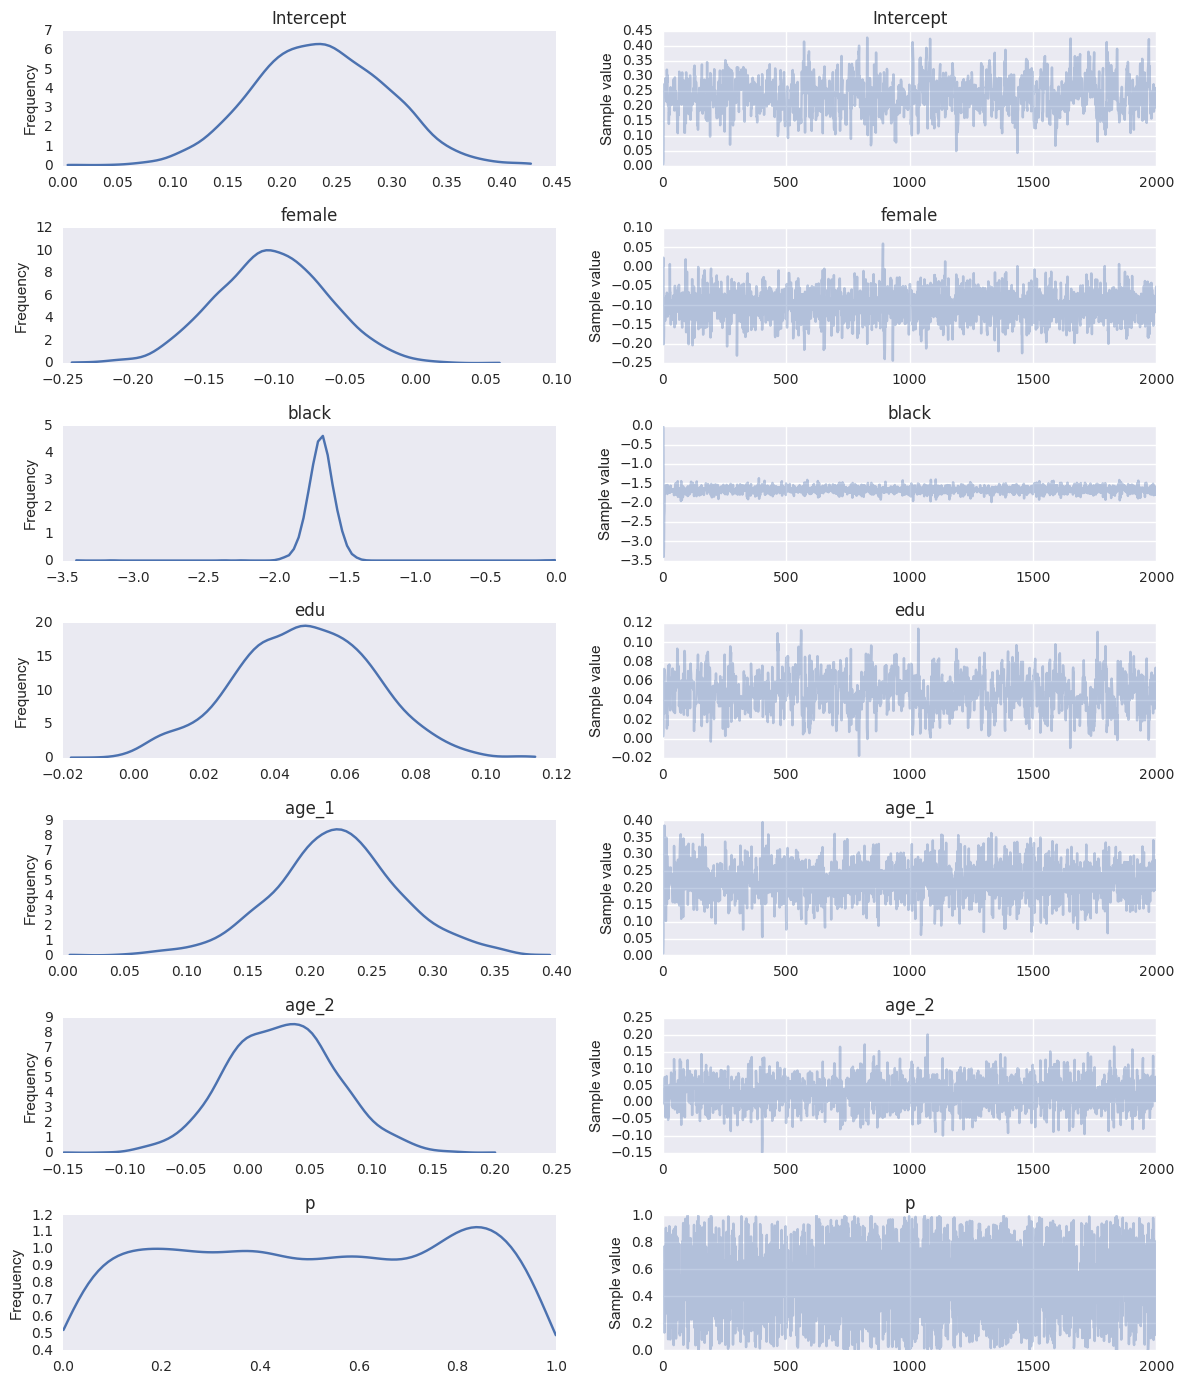

In [51]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace_logistic_model)
plt.tight_layout()

In [64]:
def predic_individuals(dictionary, model):
    coefs=sum([model[key]*value for key, value in dictionary.items()])
    return 1/(1+np.exp(-(model['Intercept']+coefs)))

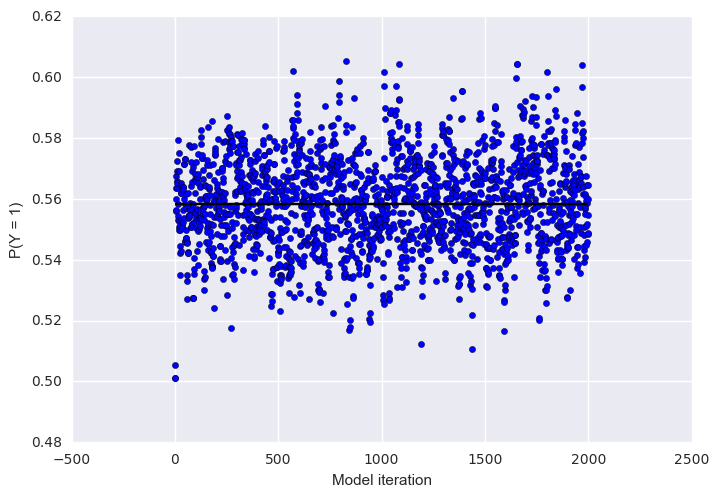

In [67]:
person = {
    'black':0,
    'female':0,
    'age_1':0,
    'age_2':0
}
plot_results(predic_individuals(person, trace_logistic_model))